In [1]:
import os
import pickle

import matplotlib.pyplot as plt
from seaborn import set_style
set_style("darkgrid")
import skimage as ski

from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import constraints
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

In [2]:
#from pynvml.smi import nvidia_smi
#nvsmi = nvidia_smi.getInstance()
#nvsmi.DeviceQuery('memory.free, memory.total')

In [3]:
#!nvidia-smi

In [4]:
# prepare data
input_dir = 'C:/Users/Jared/Documents/GitHub/my_road_project/assets/images/dataset/labeled/all coords/'
categories = [str(x) for x in range(2)]

data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = ski.color.rgb2gray(img)
        img = resize(img, (320, 320))
        data.append(img) #was img.flatten() for SVM
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

In [5]:
data[901]

array([[0.37438769, 0.35092386, 0.38614776, ..., 0.71385132, 0.67699373,
        0.70867232],
       [0.32791567, 0.41256842, 0.37468317, ..., 0.54537133, 0.61164596,
        0.58861751],
       [0.33682262, 0.37429027, 0.37863055, ..., 0.41627976, 0.51719455,
        0.55636829],
       ...,
       [0.57165798, 0.53954195, 0.43189309, ..., 0.37947933, 0.30233378,
        0.15381755],
       [0.58549066, 0.4843519 , 0.35677284, ..., 0.06330137, 0.04148745,
        0.04530444],
       [0.50922989, 0.40909426, 0.31289457, ..., 0.07796192, 0.07908771,
        0.06359877]])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)


In [7]:
#initialize the model

model = models.Sequential()


## adding our first convolutional layer

## Conv2D(32, specifies that we want a convolutional layer with depth 32
## (3,3) is our sliding grid size
## We're using the relu activation function
## and our images are a gray scale value for 28X28 pixels, hence the input_shape
model.add( layers.Conv2D(64, (3,3), activation='relu', input_shape=(320,320,1,)  ) )
model.add(layers.Dropout(.1))
model.add( layers.MaxPooling2D( (2,2), strides = 2 ) )
model.add( layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Dropout(.1))
## adding our first Max Pooling layer
## MaxPooling2D((2,2) tells python we want to add
## a max pooling layer that uses a (2,2) square grid
## strides = 2, sets the stride value to 2
model.add( layers.MaxPooling2D( (2,2), strides = 2 ) )


## Add another layer, alternating between conv and pool
model.add( layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Dropout(.1))
model.add( layers.MaxPooling2D( (2,2), strides = 2 ) )
model.add( layers.Conv2D(128, (3,3), activation='relu'))
model.add( layers.AveragePooling2D( (4,4), strides=2) )




## Now we'll add the fully connected layer

## .Flatten() will flatten the data for us,
## meaning the last output data will turn into 
## a vector
model.add( layers.Flatten() )

## We've seen these before
## Then we add a single dense hidden layer
## This is 64 nodes high
model.add(layers.Dense(64, activation='relu',kernel_constraint=constraints.MaxNorm(3)))

#dropout layer to reduce overfitting
model.add(layers.Dropout(.2))


## Finally an output layer
model.add(layers.Dense(2, activation='softmax'))




#adam or rmsprop?

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Jared\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:

#initialize the model

bigred_model = models.Sequential()


## adding our first convolutional layer

## Conv2D(32, specifies that we want a convolutional layer with depth 32
## (3,3) is our sliding grid size
## We're using the relu activation function
## and our images are a gray scale value for 28X28 pixels, hence the input_shape
bigred_model.add( layers.Conv2D(64, (3,3), activation='relu', input_shape=(320,320,1,)  ) )
bigred_model.add(layers.Dropout(.1))
bigred_model.add( layers.Conv2D(64, (3,3), activation='relu'))
bigred_model.add(layers.Dropout(.1))
## adding our first Max Pooling layer
## MaxPooling2D((2,2) tells python we want to add
## a max pooling layer that uses a (2,2) square grid
## strides = 2, sets the stride value to 2
bigred_model.add( layers.MaxPooling2D( (2,2), strides = 2 ) )


## Add another layer, alternating between conv and pool
bigred_model.add( layers.Conv2D(128, (3,3), activation='relu'))
bigred_model.add(layers.Dropout(.1))
bigred_model.add( layers.Conv2D(128, (3,3), activation='relu'))
bigred_model.add(layers.Dropout(.1))
bigred_model.add( layers.MaxPooling2D( (2,2), strides=2) )


## Add another layer, alternating between conv and pool
bigred_model.add( layers.Conv2D(256, (3,3), activation='relu'))
bigred_model.add(layers.Dropout(.1))
bigred_model.add( layers.Conv2D(256, (3,3), activation='relu'))
bigred_model.add(layers.Dropout(.1))
bigred_model.add( layers.Conv2D(256, (3,3), activation='relu'))
bigred_model.add( layers.AveragePooling2D( (4,4), strides=2) )










## Now we'll add the fully connected layer

## .Flatten() will flatten the data for us,
## meaning the last output data will turn into 
## a vector
bigred_model.add( layers.Flatten() )

## We've seen these before
## Then we add a single dense hidden layer
## This is 64 nodes high
bigred_model.add(layers.Dense(64, activation='relu',kernel_constraint=constraints.MaxNorm(3)))

#dropout layer to reduce overfitting
bigred_model.add(layers.Dropout(.5))


## Finally an output layer
bigred_model.add(layers.Dense(2, activation='softmax'))




#adam or rmsprop?

bigred_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()


epochs=100

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 318, 318, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 318, 318, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 159, 159, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 157, 157, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 157, 157, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 78, 78, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 76, 76, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 76, 76, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 38, 38, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 36, 36, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 17, 17, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,367,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,626,690 (10.02 MB)

 Trainable params: 2,626,690 (10.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train, 
                      to_categorical(y_train), 
                      epochs=epochs, 
                      batch_size=32,
                      validation_data=(x_test,to_categorical(y_test)),verbose = 1)

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.5379 - loss: 0.7220 - val_accuracy: 0.7027 - val_loss: 0.5750
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.6971 - loss: 0.6009 - val_accuracy: 0.7217 - val_loss: 0.5569
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.7199 - loss: 0.5531 - val_accuracy: 0.7273 - val_loss: 0.5447
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.7197 - loss: 0.5453 - val_accuracy: 0.7285 - val_loss: 0.5462
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.7558 - loss: 0.5159 - val_accuracy: 0.6824 - val_loss: 0.6383
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.7570 - loss: 0.5149 - val_accuracy: 0.6536 - val_loss: 0.7164
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.7602 - loss: 0.5019 - val_accuracy: 0.7703 - val_loss: 0.5116
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.7805 - loss: 0.4689 - 

KeyboardInterrupt: 

In [ ]:
history_dict = history.history

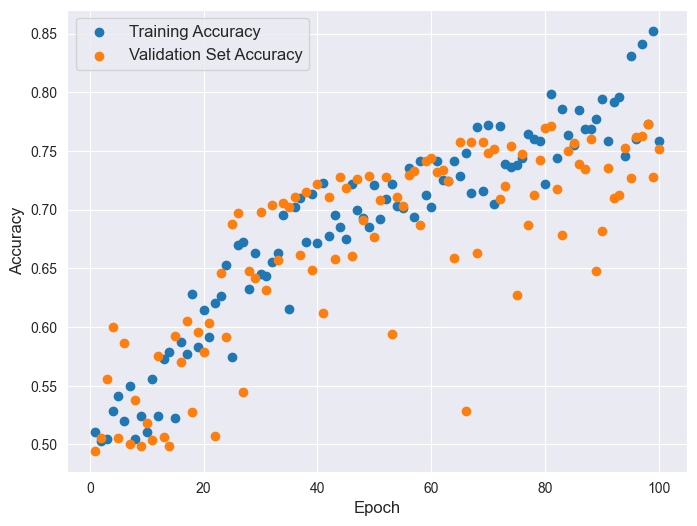

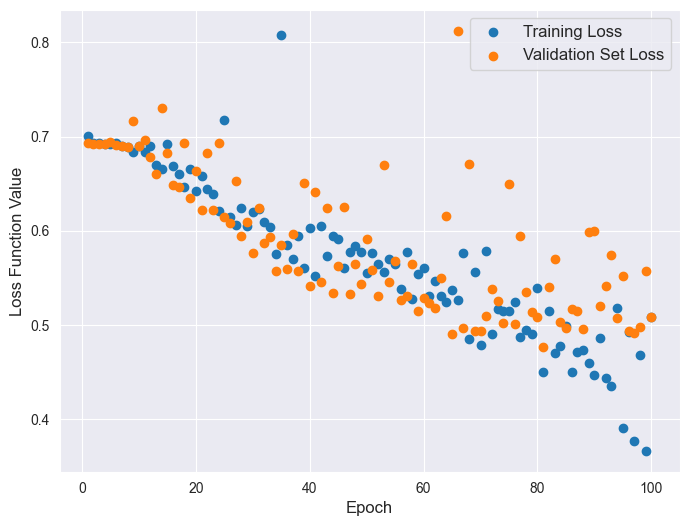

In [ ]:
plt.figure(figsize = (8,6))

plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()


plt.figure(figsize = (8,6))

plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss Function Value", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


In [ ]:
y_pred[2]

0

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
                columns=["predicted "+str(i) for i in range(2)],
                index=["actual "+str(i) for i in range(2)])

,predicted 0,predicted 1
actual 0,429,185
actual 1,117,484
